In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from os import listdir
from os.path import isfile, join

In [3]:
results_path = 'results'

file_list = [f for f in listdir(results_path) if isfile(join(results_path, f))]

frames = []
for file_name in file_list:
    if file_name.endswith('_100.csv'):
        splitted_name = file_name.split('_')
        df = pd.read_csv(results_path+'/'+file_name)
        df['alphabet_len'] = len(splitted_name[1])
        df['test_type'] = splitted_name[2]
        frames.append(df)
results = pd.concat(frames)
results = results[['algorithm','alphabet_len','test_type','len','clock_time','ed']]

results.head()

,algorithm,alphabet_len,test_type,len,clock_time,ed
0,divide_and_conquer,8,randompair,5,0.000152,5.0
1,dinamic_programming,8,randompair,5,0.000113,5.0
2,divide_and_conquer,8,randompair,5,0.000150,5.0
3,dinamic_programming,8,randompair,5,0.000130,5.0
4,divide_and_conquer,8,randompair,5,0.000138,5.0


In [31]:
results['alphabet_len'].unique()

array([22, 10,  8,  2, 52, 26], dtype=int64)

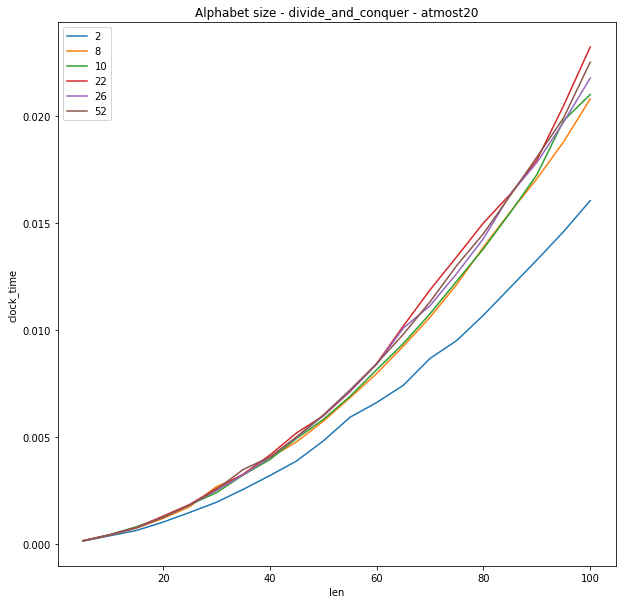

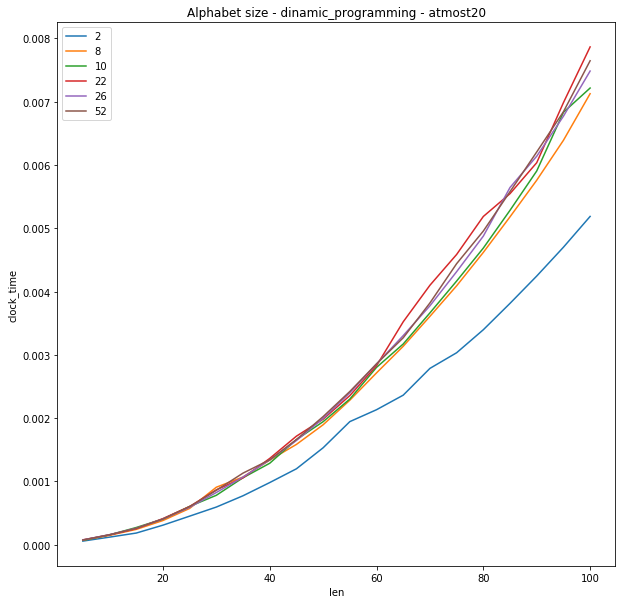

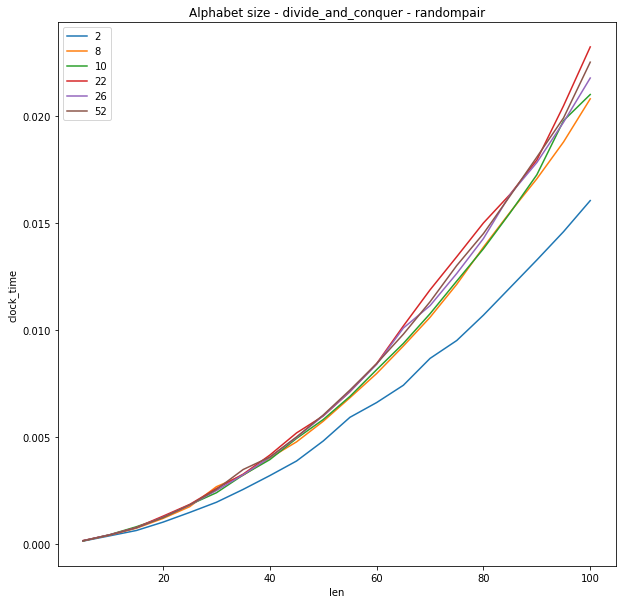

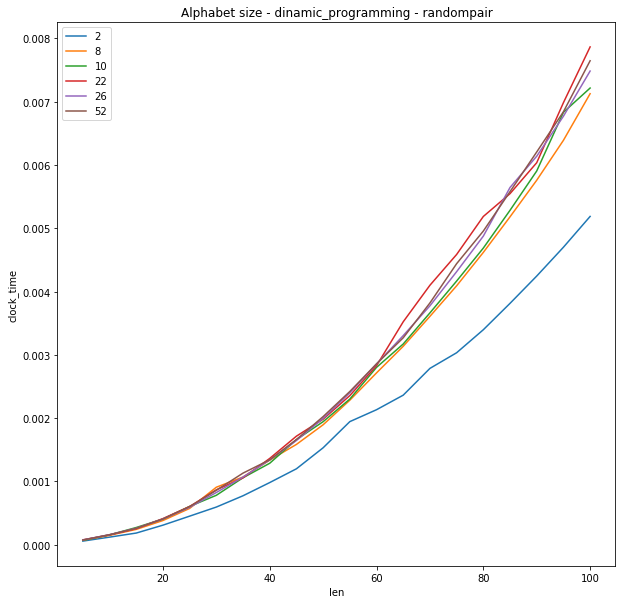

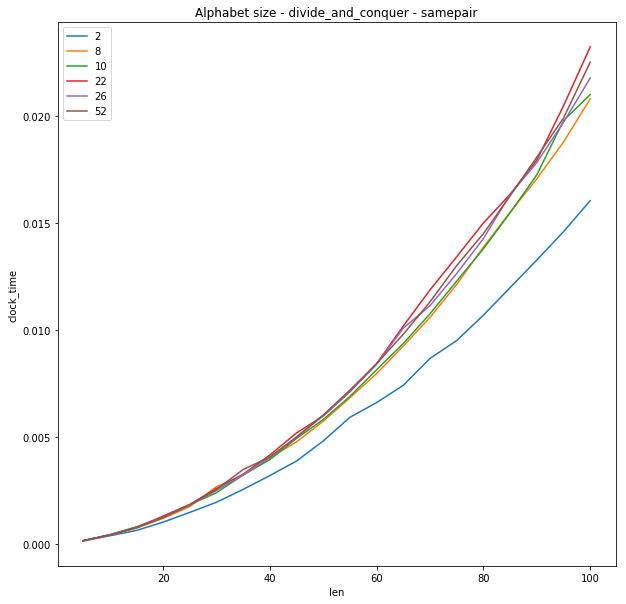

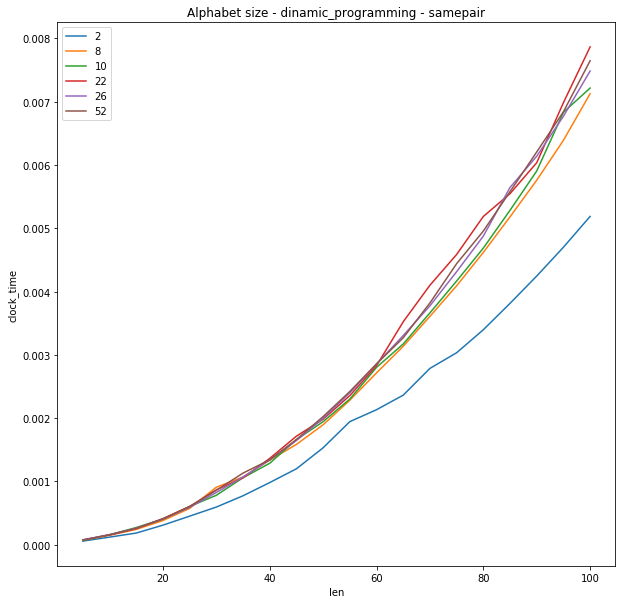

In [41]:
for test_type in results['test_type'].unique():
    for algo in results['algorithm'].unique():
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_title('Alphabet size - '+algo+' - '+test_type)

        alphabet_list = results['alphabet_len'].unique()
        alphabet_list.sort()
        for alpha_len in alphabet_list:
            graph_data = results[(results['alphabet_len'] == alpha_len) & (results['algorithm'] == algo)]
            graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

            g = sns.lineplot(data = graph_data, x='len', y='clock_time', ax = ax, label=alpha_len)

        plt.show()

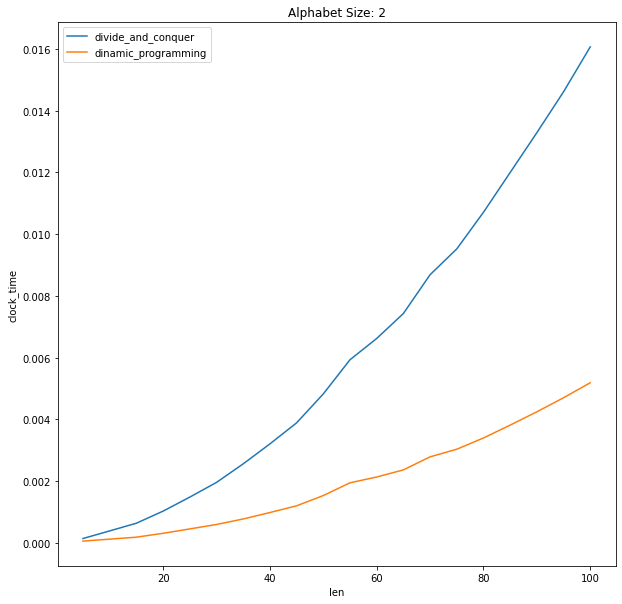

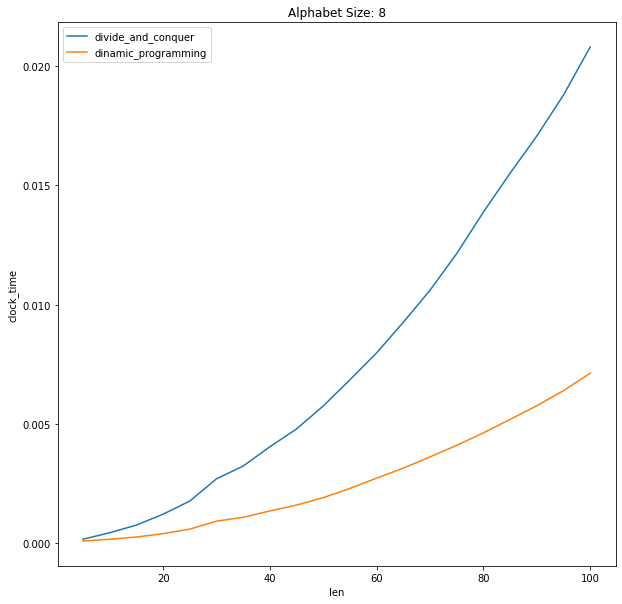

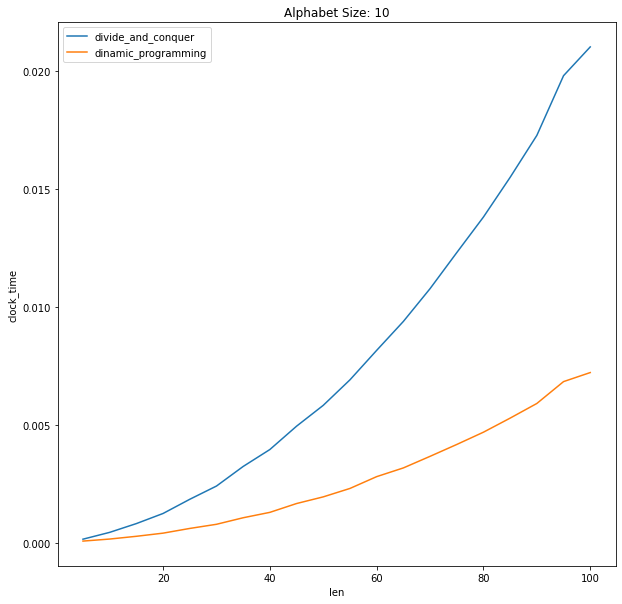

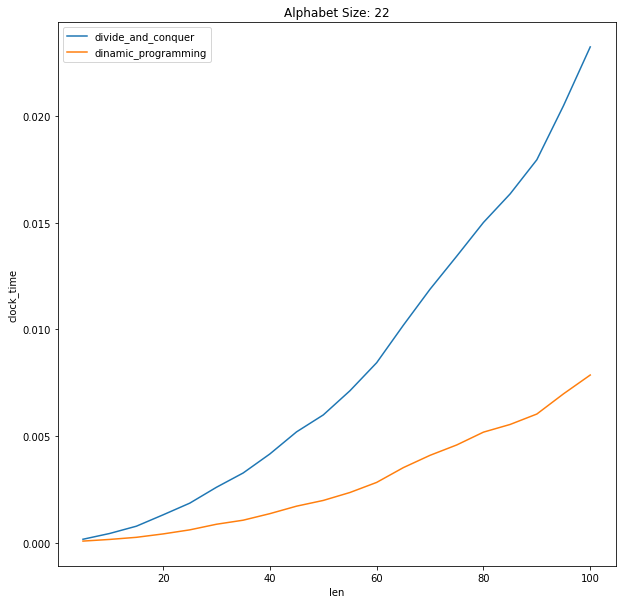

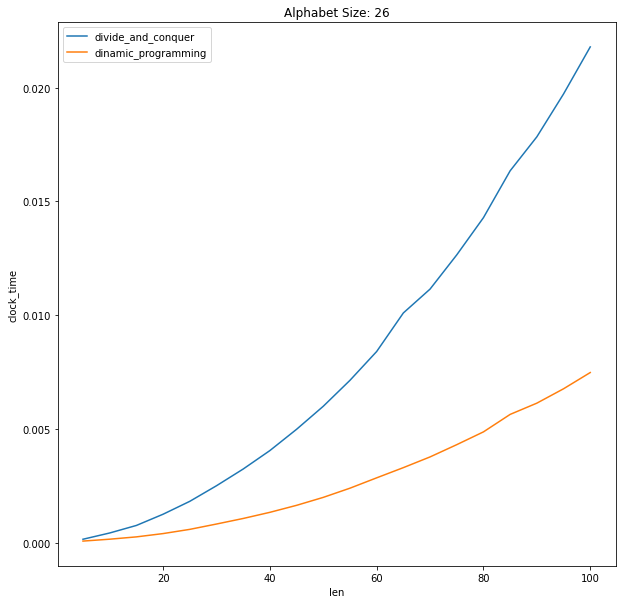

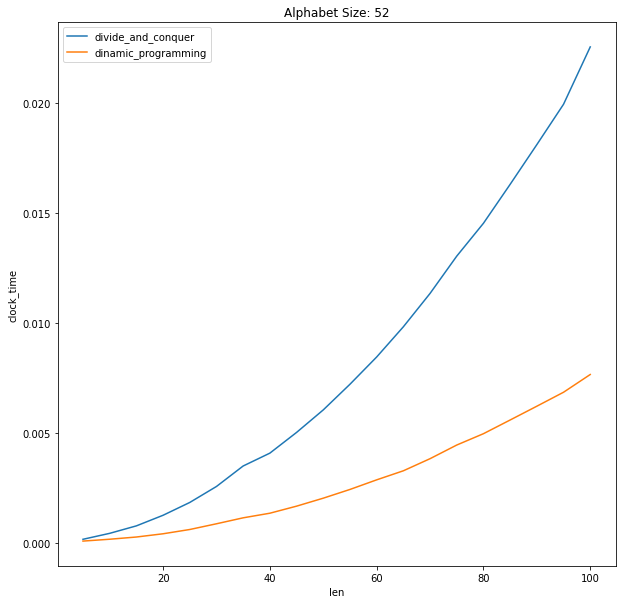

In [12]:
alphabet_list = results['alphabet_len'].unique()
alphabet_list.sort()

for alpha_len in alphabet_list:
    fig, ax = plt.subplots(figsize=(10,10))
    for algo in results['algorithm'].unique():
        graph_data = results[(results['alphabet_len'] == alpha_len) & (results['algorithm'] == algo)]
        graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()
        
        g = sns.lineplot(data = graph_data, x='len', y='clock_time', ax = ax, label=algo)
        
    ax.set_title('Alphabet Size: '+str(alpha_len))
    plt.show()

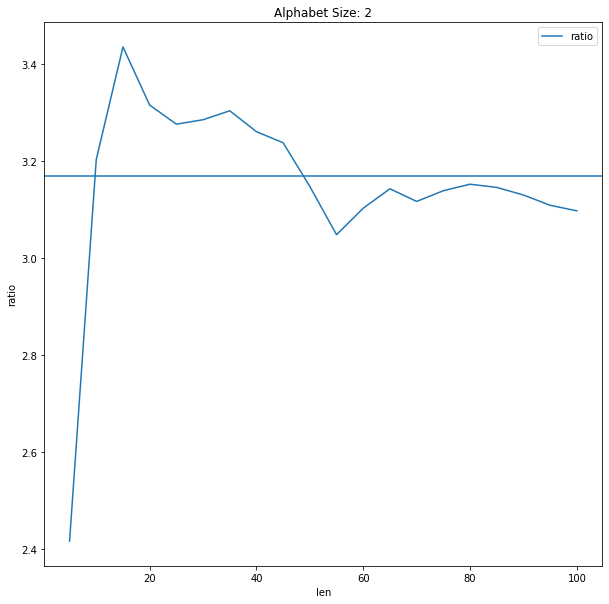

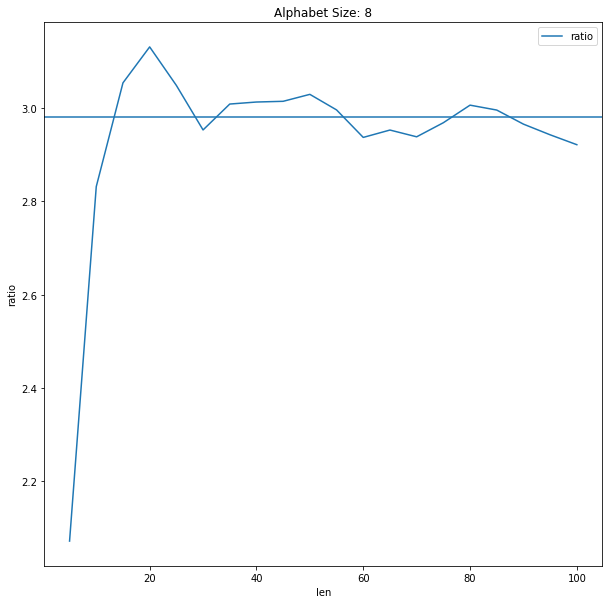

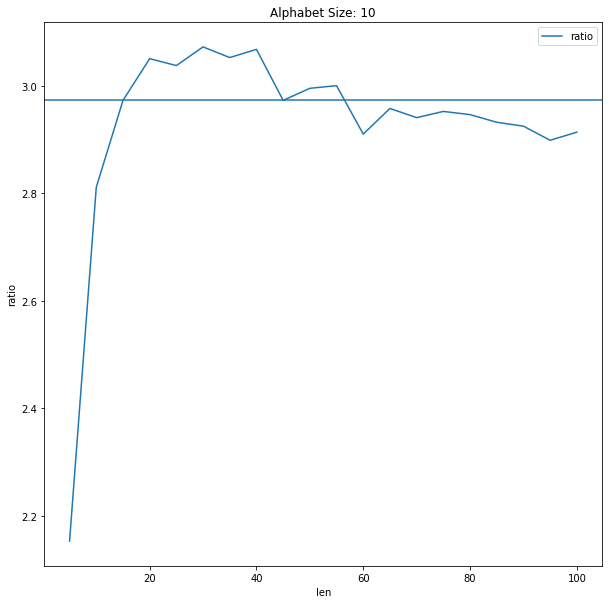

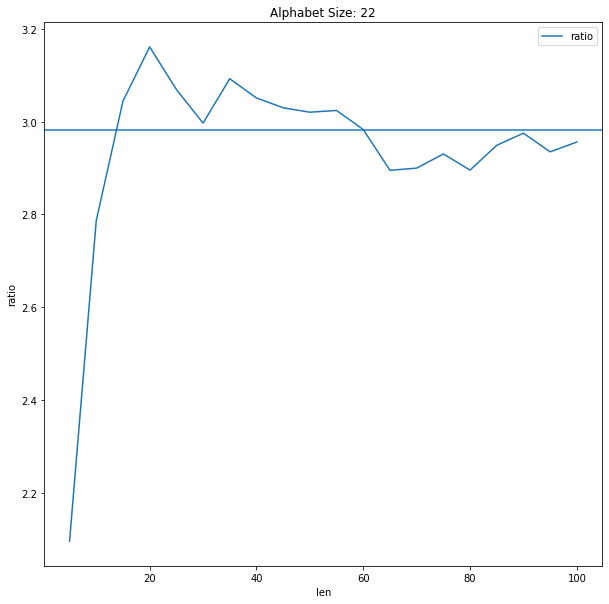

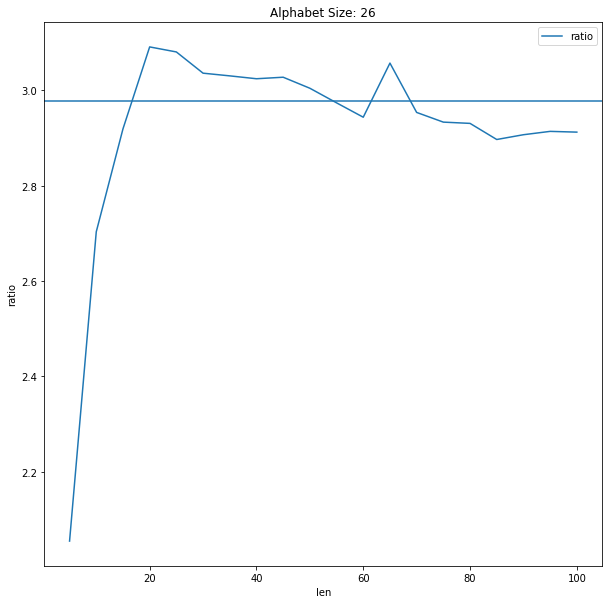

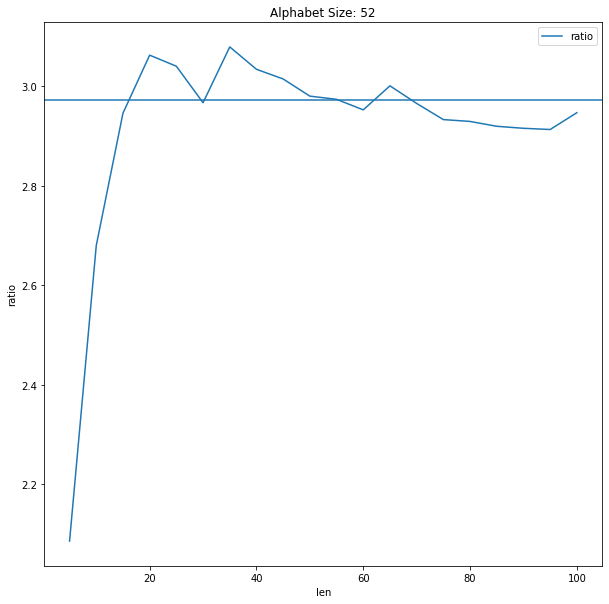

In [84]:
alphabet_list = results['alphabet_len'].unique()
alphabet_list.sort()

for alpha_len in alphabet_list:
    
    graph_data = results[(results['alphabet_len'] == alpha_len)]
    graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()
    graph_data = graph_data.pivot_table(index = ["alphabet_len","len"], columns = ["algorithm"], values = "clock_time").reset_index()
    graph_data["ratio"] = (graph_data["divide_and_conquer"]/graph_data["dinamic_programming"])
    
    fig, ax = plt.subplots(figsize=(10,10))
    g = sns.lineplot(data = graph_data, x='len', y='ratio', ax = ax, label="ratio")
    g.axhline(graph_data[(graph_data['len'] > 20)]["ratio"].mean())
    ax.set_title('Alphabet Size: '+str(alpha_len))
    plt.show()
    